In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv("data_covid.csv")

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,4.101700e+04,40832.000000,40050.000000,41017.000000,40832.000000,40050.000000,40768.000000,40768.000000,39985.000000,40768.000000,...,36942.000000,36669.000000,24487.000000,37147.000000,38443.000000,29234.000000,28869.000000,17273.000000,33634.000000,40830.000000
mean,8.009179e+04,1289.953223,1275.180432,3516.050052,42.574892,42.580165,1560.675821,21.881736,21.555024,50.885221,...,5.899399,21111.724839,11.882276,250.945360,8.045957,10.866801,32.639486,52.766899,3.123081,74.099070
std,8.294860e+05,11820.448234,11603.523688,32933.456938,362.518367,352.612193,3449.777105,69.711744,52.976045,135.267976,...,4.329820,20530.928588,19.040777,117.768862,4.135962,10.487131,13.395252,31.541156,2.537061,7.354087
min,0.000000e+00,-2461.000000,-338.857000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,3.900000e+01,0.000000,0.429000,0.000000,0.000000,0.000000,18.936000,0.000000,0.096000,0.000000,...,2.142000,5591.597000,0.500000,153.507000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000
50%,7.800000e+02,8.000000,12.571000,13.000000,0.000000,0.143000,240.800500,1.269000,2.573000,3.882500,...,4.419000,14103.452000,1.800000,237.372000,7.110000,6.434000,31.400000,55.182000,2.500000,75.490000
75%,8.481000e+03,142.000000,146.571000,178.000000,3.000000,2.857000,1515.576000,14.652000,16.176000,29.624000,...,9.719000,32415.132000,15.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000
max,2.633568e+07,298107.000000,266780.286000,869209.000000,10491.000000,7456.571000,41450.022000,4944.376000,882.924000,1237.551000,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [5]:
import seaborn as sns

In [6]:
df1 = df.copy()

In [7]:
df1 = df1.dropna(inplace = True)

In [8]:
df1

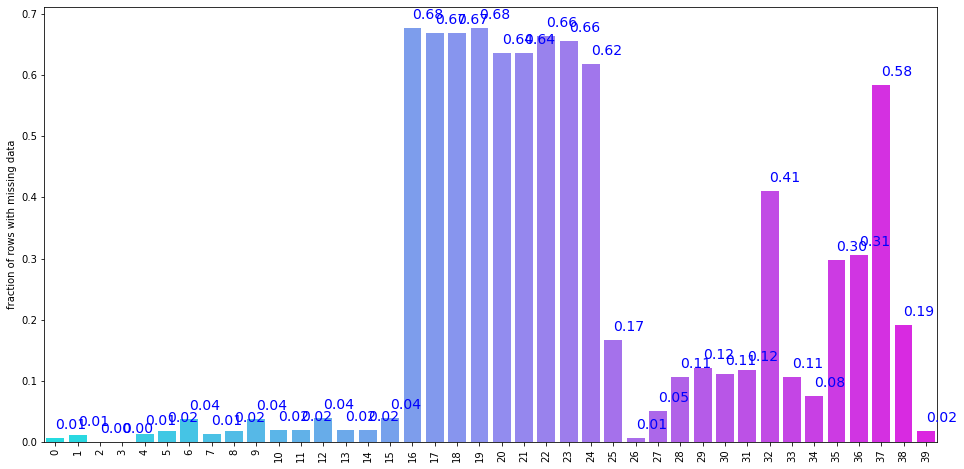

In [9]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
vis1= sns.barplot(np.arange(len(null_counts)),null_counts,palette='cool')


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='left', va='top', fontsize=14, color='blue', xytext=(0, 20),
                 textcoords='offset points')
        #This annotation provides the fraction of missing data.
        
plt.show()


In [ ]:
print(null_counts[null_counts<0.32])

In [10]:
tag = null_counts[null_counts>0.32].to_dict()

In [11]:
tag.keys()

dict_keys(['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'extreme_poverty', 'handwashing_facilities'])

In [12]:
columns = ['new_tests', 'total_tests',
           'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 
           'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 
           'tests_units', 'extreme_poverty', 'handwashing_facilities']

In [13]:

df = df.drop(columns = columns)

In [ ]:
df1

In [ ]:
len(df1["location"].unique())

In [ ]:
df1.columns

In [ ]:
list_ = ["new_cases_smoothed","new_deaths_smoothed","new_cases_smoothed_per_million",
         "new_deaths_smoothed_per_million","new_tests_smoothed","new_tests_smoothed_per_thousand"
         "positive_rate","stringency_index",
         "population",
        "population_density",
        "median_age",
        "aged_65_older",
        "aged_70_older",
        "gdp_per_capita",
        "extreme_poverty",
        "cardiovasc_death_rate",
        "diabetes_prevalence",
        "female_smokers",
        "male_smokers",
        "handwashing_facilities",
        "hospital_beds_per_thousand",
        "life_expectancy"]

In [ ]:
list_

In [ ]:
list_

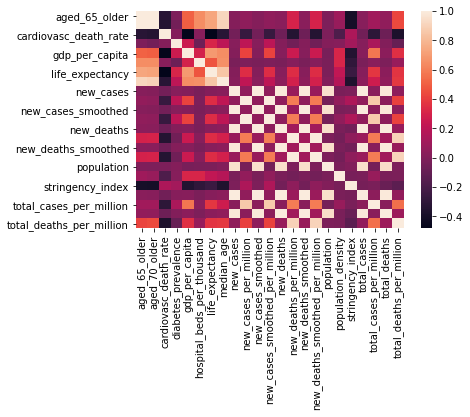

In [35]:
sns.heatmap(df.corr())

In [ ]:
df[df["location"] == "Aruba"].mean()

In [ ]:
df

In [36]:
from feature_selector import FeatureSelector

import pandas as pd

In [61]:
fs = FeatureSelector(data = df, labels = "labels")

In [62]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [63]:
missing_features = fs.ops['missing']
missing_features[:10]

[]

In [64]:
fs.missing_stats.head()

,missing_fraction
hospital_beds_per_thousand,0.221698
stringency_index,0.150943
aged_65_older,0.132075
gdp_per_capita,0.132075
cardiovasc_death_rate,0.122642


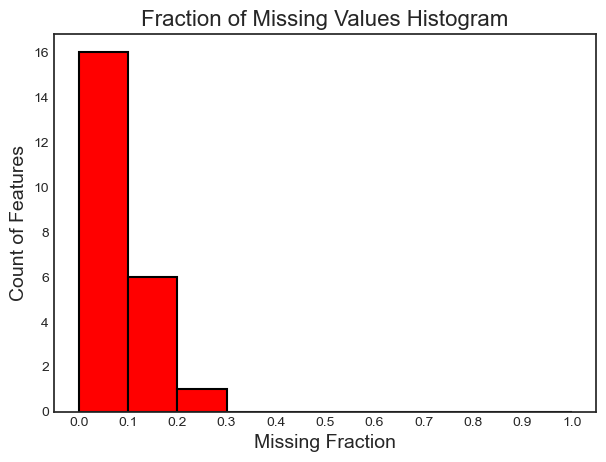

In [65]:
fs.plot_missing()

In [66]:
fs.identify_single_unique()

0 features with a single unique value.



In [67]:
fs.identify_collinear(correlation_threshold=0.975)

8 features with a correlation magnitude greater than 0.97.



In [68]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['aged_70_older',
 'new_cases_smoothed',
 'new_cases_smoothed_per_million',
 'new_deaths',
 'new_deaths_smoothed']

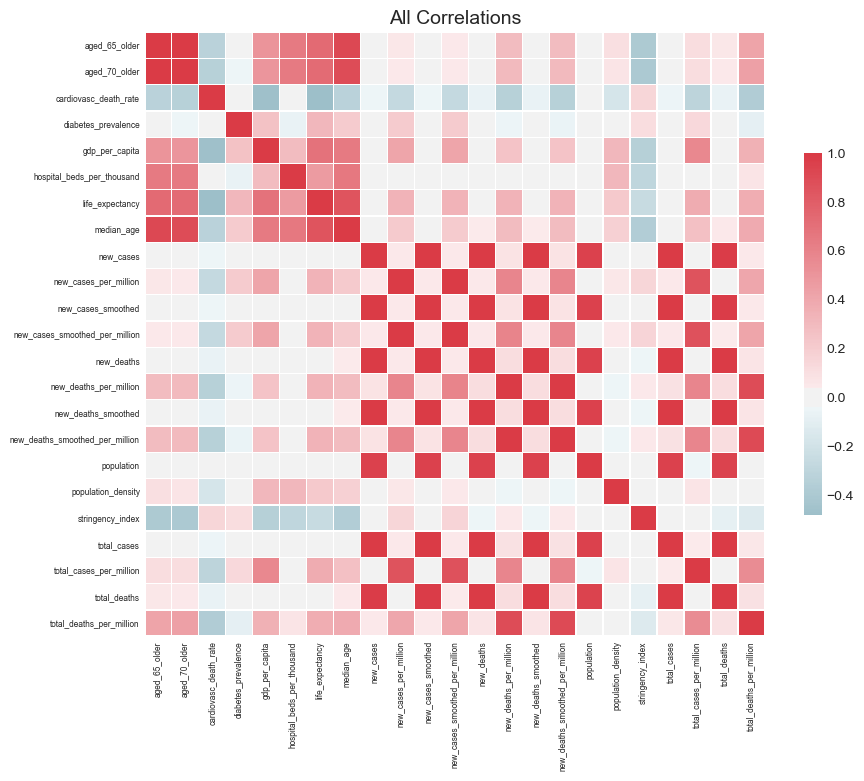

In [69]:
fs.plot_collinear(plot_all=True)

In [70]:
fs.record_collinear.head

<bound method NDFrame.head of                        drop_feature            corr_feature  corr_value
0                     aged_70_older           aged_65_older    0.994338
1                new_cases_smoothed               new_cases    0.999981
2    new_cases_smoothed_per_million   new_cases_per_million    0.998599
3                        new_deaths               new_cases    0.994139
4                        new_deaths      new_cases_smoothed    0.994384
5               new_deaths_smoothed               new_cases    0.994045
6               new_deaths_smoothed      new_cases_smoothed    0.994308
7               new_deaths_smoothed              new_deaths    0.999990
8   new_deaths_smoothed_per_million  new_deaths_per_million    0.998992
9                       total_cases               new_cases    0.997088
10                      total_cases      new_cases_smoothed    0.997483
11                      total_cases              new_deaths    0.995849
12                      total_case

In [72]:
regions = ['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France', 'Faeroe Islands',
       'Gabon', 'United Kingdom', 'Georgia', 'Guernsey', 'Ghana',
       'Gibraltar', 'Guinea', 'Gambia', 'Guinea-Bissau',
       'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala',
       'Guam', 'Guyana', 'Hong Kong', 'Honduras', 'Croatia', 'Haiti',
       'Hungary', 'Indonesia', 'Isle of Man', 'India', 'Ireland', 'Iran',
       'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jersey',
       'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Cambodia',
       'Saint Kitts and Nevis', 'South Korea', 'Kuwait', 'Laos',
       'Lebanon', 'Liberia', 'Libya', 'Saint Lucia', 'Liechtenstein',
       'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg', 'Latvia',
       'Morocco', 'Monaco', 'Moldova', 'Madagascar', 'Maldives', 'Mexico',
       'Macedonia', 'Mali', 'Malta', 'Myanmar', 'Montenegro', 'Mongolia',
       'Northern Mariana Islands', 'Mozambique', 'Mauritania',
       'Montserrat', 'Mauritius', 'Malawi', 'Malaysia', 'Namibia',
       'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands',
       'Norway', 'Nepal', 'New Zealand', 'Oman', 'Pakistan', 'Panama',
       'Peru', 'Philippines', 'Papua New Guinea', 'Poland', 'Puerto Rico',
       'Portugal', 'Paraguay', 'Palestine', 'French Polynesia', 'Qatar',
       'Romania', 'Russia', 'Rwanda', 'Saudi Arabia', 'Sudan', 'Senegal',
       'Singapore', 'Sierra Leone', 'El Salvador', 'San Marino',
       'Somalia', 'Serbia', 'South Sudan', 'Sao Tome and Principe',
       'Suriname', 'Slovakia', 'Slovenia', 'Sweden', 'Swaziland',
       'Sint Maarten (Dutch part)', 'Seychelles', 'Syria',
       'Turks and Caicos Islands', 'Chad', 'Togo', 'Thailand',
       'Tajikistan', 'Timor', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Taiwan', 'Tanzania', 'Uganda', 'Ukraine', 'Uruguay',
       'United States', 'Uzbekistan', 'Vatican',
       'Saint Vincent and the Grenadines', 'Venezuela',
       'British Virgin Islands', 'United States Virgin Islands',
       'Vietnam', 'Kosovo', 'Yemen', 'South Africa', 'Zambia', 'Zimbabwe',
       'World', 'International']

In [17]:
dict_={}

for i in regions:
    dict_[i]= df[df["location"]==i].mean()

In [18]:
df = pd.DataFrame(dict_)

In [28]:
df.head()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,median_age,new_cases,new_cases_per_million,...,new_deaths_per_million,new_deaths_smoothed,new_deaths_smoothed_per_million,population,population_density,stringency_index,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million
Aruba,13.085,7.452,NaN,11.62,35973.781,NaN,76.29,41.2,13.807229,129.322325,...,0.733488,0.062229,0.582424,106766.0,584.800,53.176748,312.759036,2929.387970,2.987952,27.986133
Afghanistan,2.581,1.337,597.029,9.59,1803.987,0.50,64.83,18.6,160.200837,4.115289,...,0.151552,5.783091,0.148514,38928341.0,54.422,53.839328,14065.949791,361.329335,420.945607,10.813347
Angola,2.405,1.362,276.045,3.94,5819.495,NaN,61.15,16.8,16.628743,0.505964,...,0.020341,0.670845,0.020416,32866268.0,23.890,78.040307,554.209581,16.862551,24.886228,0.757251
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN,0.018519,1.234407,...,0.000000,0.000000,0.000000,15002.0,NaN,44.543019,2.956790,197.092759,0.000000,0.000000
Albania,13.188,8.643,304.195,10.08,11803.431,2.89,78.57,38.0,54.688889,19.003683,...,0.580944,1.637172,0.568902,2877800.0,104.871,72.150174,2648.361111,920.272822,78.627778,27.322150


In [20]:
df = df.T

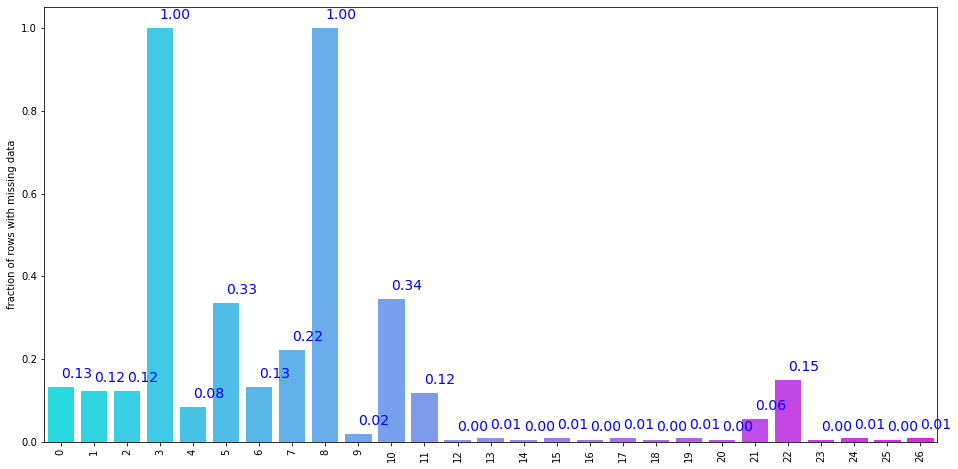

In [21]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
vis1= sns.barplot(np.arange(len(null_counts)),null_counts,palette='cool')


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='left', va='top', fontsize=14, color='blue', xytext=(0, 20),
                 textcoords='offset points')
        #This annotation provides the fraction of missing data.
        
plt.show()



In [22]:
tag = null_counts[null_counts>0.33].to_dict()

In [23]:
tag.keys()

dict_keys(['continent', 'female_smokers', 'iso_code', 'male_smokers'])

In [24]:
columns = ['continent', 'female_smokers', 'iso_code', 'male_smokers']

In [26]:
df.drop(columns = columns,inplace = True)

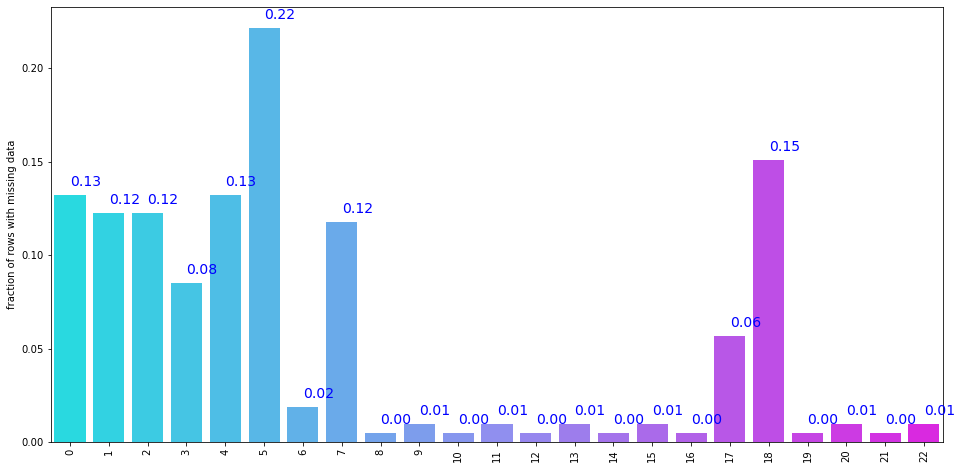

In [27]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
vis1= sns.barplot(np.arange(len(null_counts)),null_counts,palette='cool')


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='left', va='top', fontsize=14, color='blue', xytext=(0, 20),
                 textcoords='offset points')
        #This annotation provides the fraction of missing data.
        
plt.show()



In [33]:
df["total_cases"]

Aruba            False
Afghanistan      False
Angola           False
Anguilla         False
Albania          False
                 ...  
South Africa     False
Zambia           False
Zimbabwe         False
World            False
International    False
Name: total_cases, Length: 212, dtype: bool

In [60]:
train_features, valid_features, train_labels, valid_labels = train_test_split(df, labels, test_size = 0.15)

In [55]:
target = df.drop(columns  = ['total_cases'])

In [54]:
labels = df['total_cases']

In [59]:
from sklearn.model_selection import train_test_split

In [82]:
# Train the model with early stopping
model.fit(train_features, train_labels, eval_metric = "l2_root", eval_set = [(valid_features, valid_labels)],
                          early_stopping_rounds = 100, verbose = -1)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's rmse: 1.17224e+06


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              learning_rate=0.05, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=1, verbose=-1)

In [78]:
                model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)


In [76]:
import lightgbm as lgb
